In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import hdbscan

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
def func(dimensions, metric):
    print('dimensions:', dimensions)
    grouped = titanic_df.groupby(dimensions).agg(metric).reset_index()
    metric_values = grouped.values[:,len(dimensions):]
    scaled_metric_values = StandardScaler().fit_transform(metric_values)
    emb1 = umap.UMAP(random_state=101, n_neighbors=6).fit_transform(scaled_metric_values[:, :1])
    emb2 = umap.UMAP(random_state=37, n_neighbors=6).fit_transform(scaled_metric_values[:, 1:])
    clusterer1 = hdbscan.HDBSCAN()
    clusterer1.fit(emb1)
#     clusterer2 = hdbscan.HDBSCAN()
#     clusterer2.fit(emb2)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes[0][0].scatter(emb1[:, 0], emb1[:, 1], alpha=0.4, c=[sns.color_palette()[x] for x in clusterer1.labels_])
    axes[0][1].scatter(emb2[:, 0], emb2[:, 1], alpha=0.4, c=[sns.color_palette()[x] for x in clusterer1.labels_])
#     axes[1][0].scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.4, c=[sns.color_palette()[x] for x in clusterer1.labels_])
#     axes[1][1].scatter(emb1[:, 0], emb1[:, 1], alpha=0.4, c=[sns.color_palette()[x] for x in clusterer2.labels_])

In [5]:
dimensions1 = ['Pclass', 'Sex', 'Embarked']
dimensions2 = ['Pclass', 'Sex', 'Parch']
dimensions3 = ['Pclass', 'Embarked', 'Parch']
dimensions4 = ['Sex', 'Embarked', 'Parch']
dimensions5 = ['Pclass', 'Sex', 'SibSp']
dimensions6 = ['Pclass', 'Embarked', 'SibSp']
dimensions7 = ['Sex', 'Pclass']
dimensions8 = ['Sex', 'SibSp']
dimensions9 = ['Age', 'Sex']
metric = {'Fare': 'sum', 'PassengerId': 'count'}

dimensions: ['Pclass', 'Sex', 'Embarked']


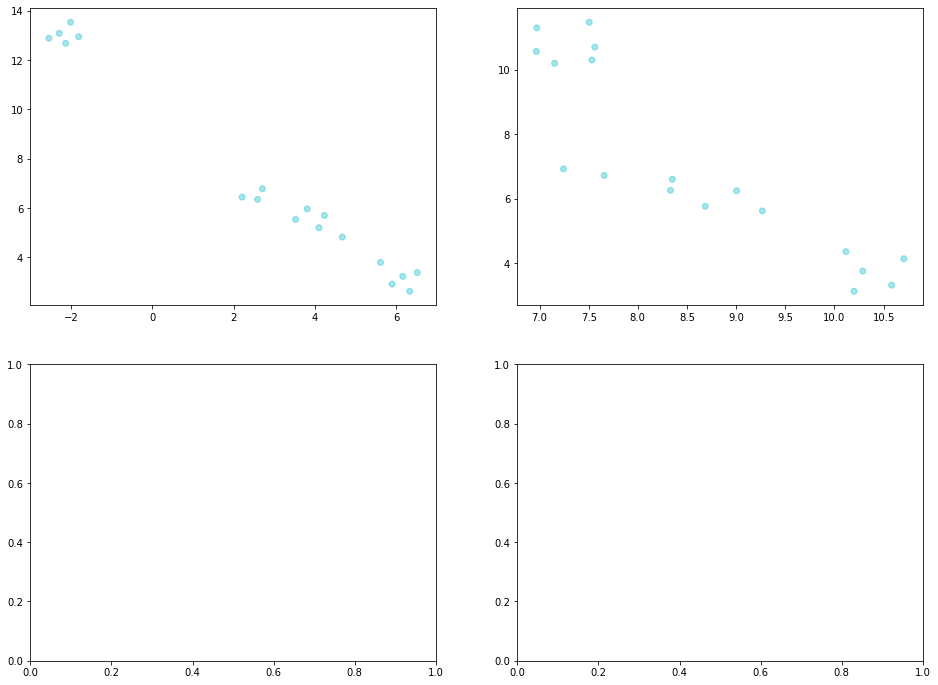

In [6]:
func(dimensions1, metric)

dimensions: ['Pclass', 'Sex', 'Parch']


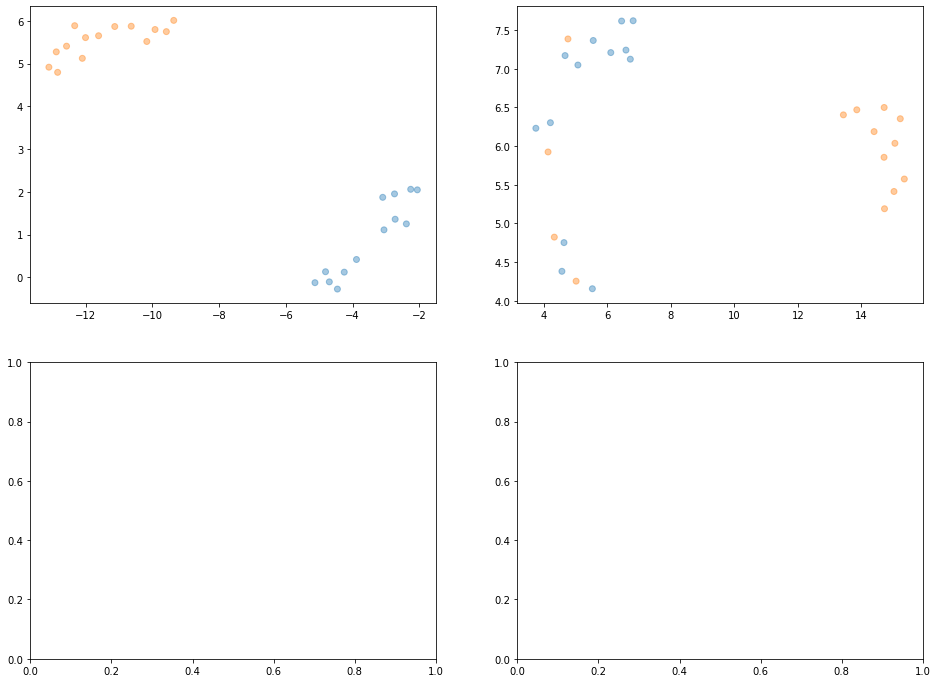

In [7]:
func(dimensions2, metric)

dimensions: ['Pclass', 'Embarked', 'Parch']


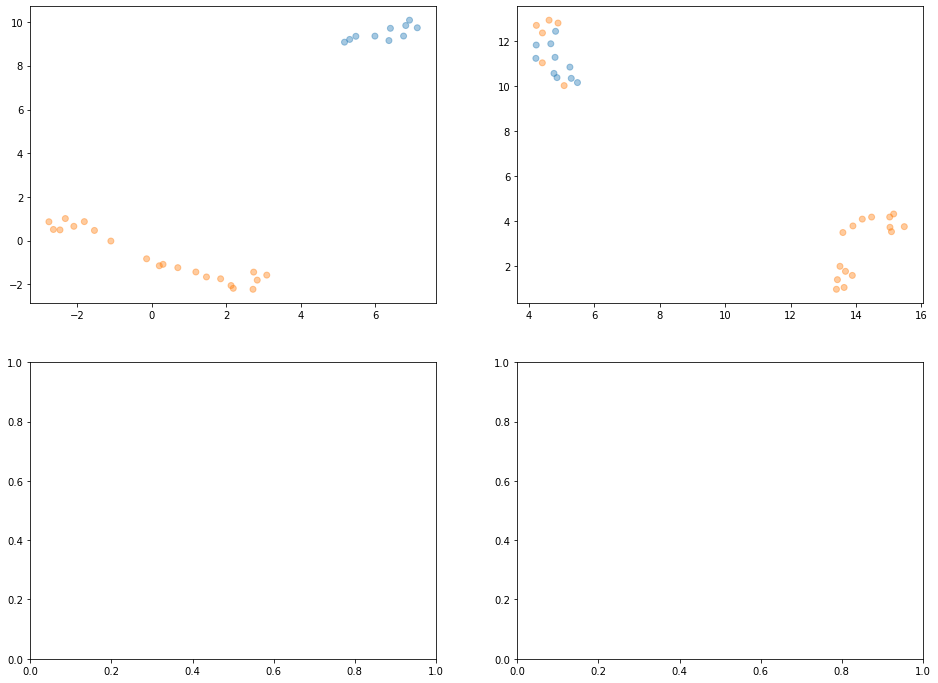

In [8]:
func(dimensions3, metric)

dimensions: ['Sex', 'Embarked', 'Parch']


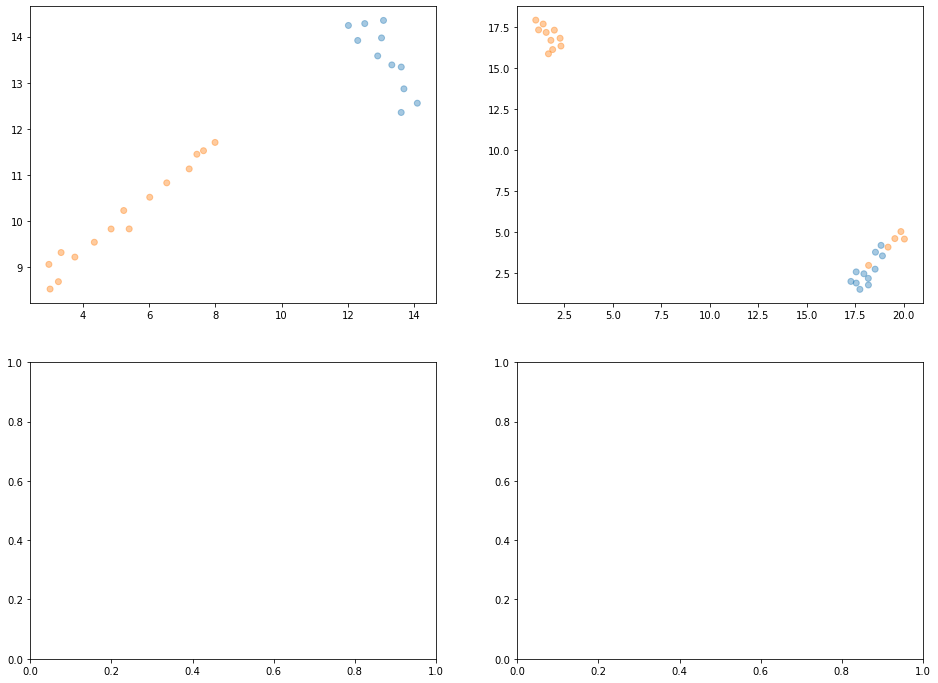

In [9]:
func(dimensions4, metric)

dimensions: ['Pclass', 'Sex', 'SibSp']


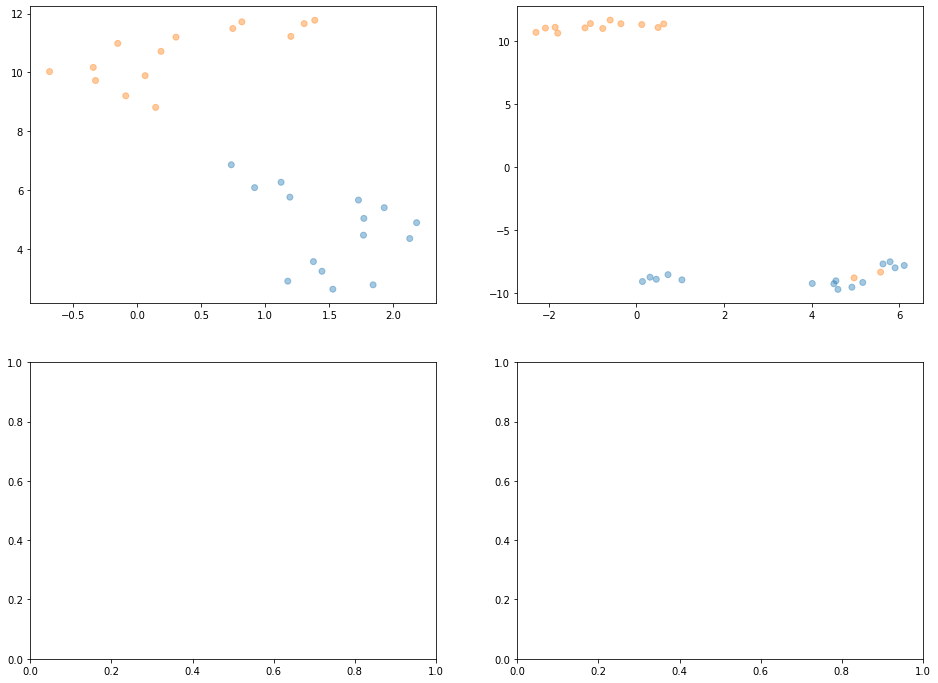

In [10]:
func(dimensions5, metric)

dimensions: ['Pclass', 'Embarked', 'SibSp']


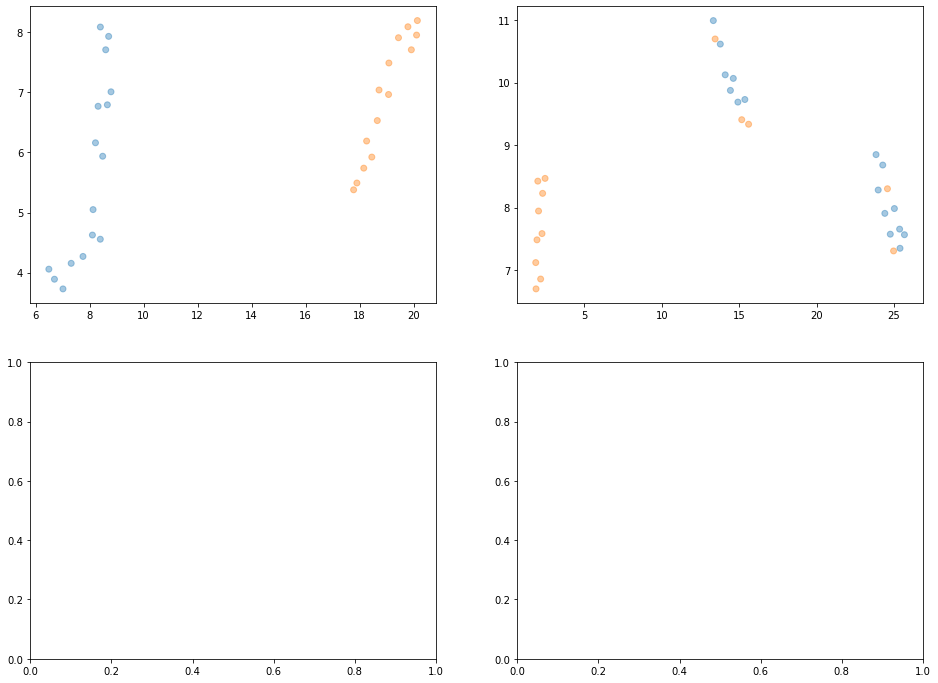

In [11]:
func(dimensions6, metric)

dimensions: ['Sex', 'Pclass']


C:\Users\Semen\Miniconda3\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
C:\Users\Semen\Miniconda3\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


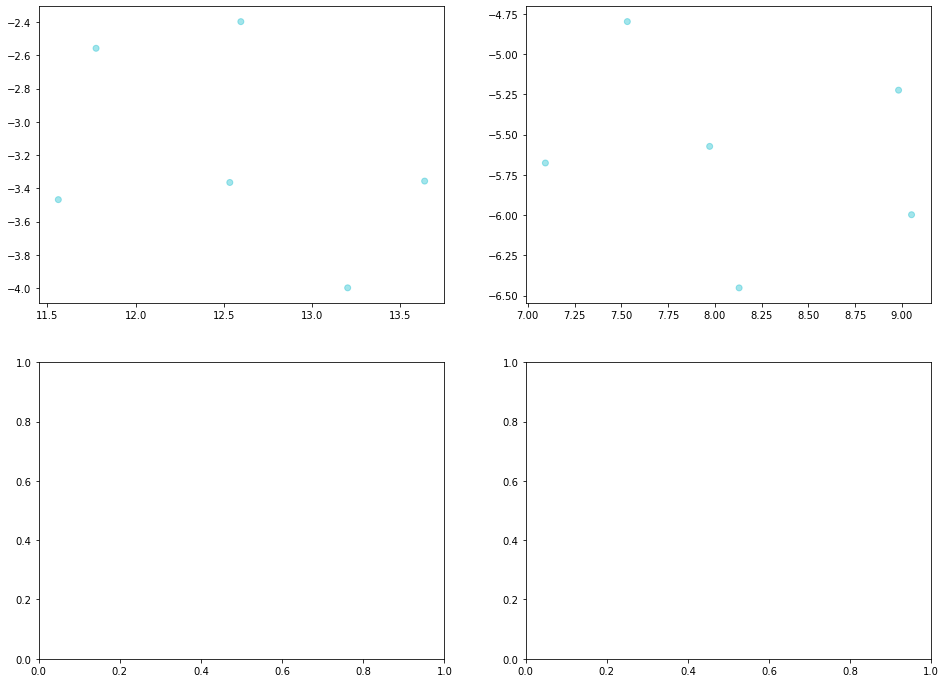

In [12]:
func(dimensions7, metric)

dimensions: ['Sex', 'SibSp']


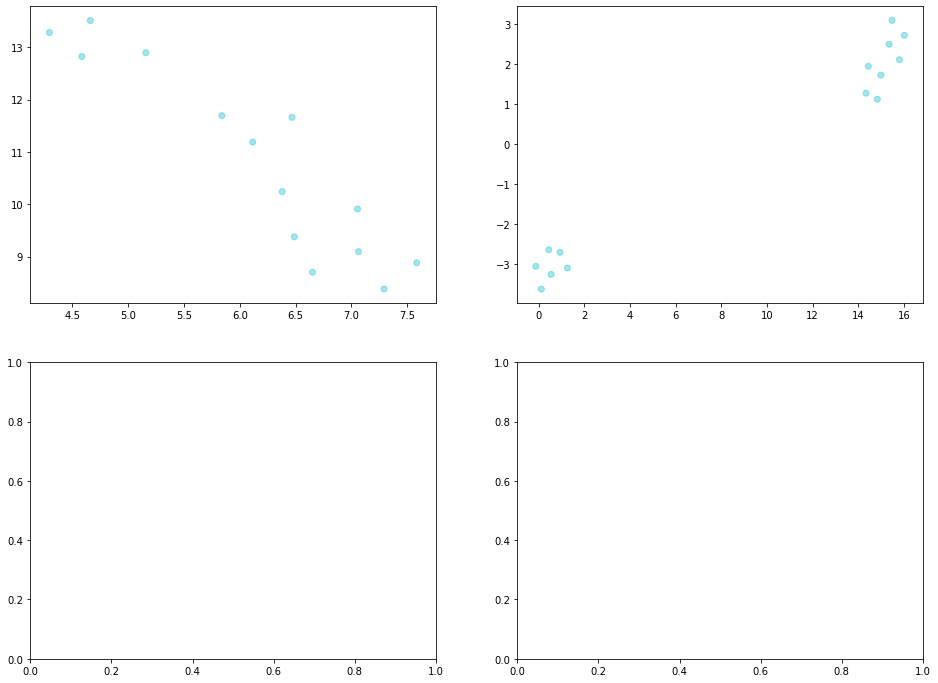

In [13]:
func(dimensions8, metric)

dimensions: ['Age', 'Sex']


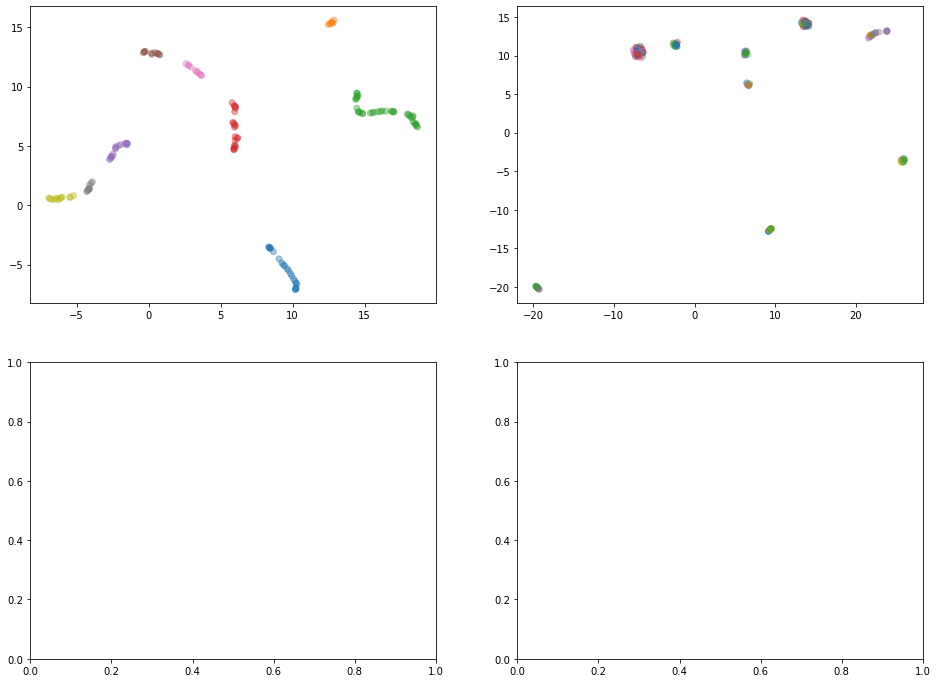

In [14]:
func(dimensions9, metric)